
# Project: Investigate a Dataset : TMDb Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda1">Exploratory Data Analysis : Q1</a></li>
<li><a href="#eda2">Exploratory Data Analysis : Q2</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset selected is the TMDb dataset that contains the data on movies and ratings.

> Trends to be explored here are:
- Popularity over the years
- Revenue over the years
- Runtime over the years

> Associations and Effects [over period spans] to be evaluated are:
- Revenue vs Popularity
- Revenue vs Vote Counts
- Revenue vs Vote Averages

Some questions to be answered are:
- Over the decades, what are the popular runtimes?
- Spanning the time periods, is revenue proportional to popularity? 
- Does runtime affect popularity? 

> The investigations conducted here are exploratory and any associations will be tentative at best, as only visualization and basic correlations are attempted in this project. Any relation inferred will be used only as a pointer for conducting further detailed, statistically backed analyses. 

> The three variables investigated here are:
- using single-variable (1d) explorations: Popularity, revenue, runtime over time
- multiple-variable (2d) explorations: Revenue over time for the factors Popularity, Vote counts and Vote Averages.

> Codes are based on Udacity DAND lessons, my own code from solving the assignments and exercises, including previous DAND projects as well as links [like StackOverflow] from the resources mentioned in DAND syllabus.

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

#import statements for packages to be used
import pandas as pd
import csv # read and write csv files
from datetime import datetime # operations to parse dates
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties
**Observations**
- Rows: 10866 
- Columns: 21
- Null values  present in variables: [as inspected in code below]
> - imdb_id 
> - cast
> - homepage
> - director
> - tagline
> - keywords
> - overview
> - genres
> - production_companies

**Cleaning Steps Taken:**
- Data is relatively clean. 
- One duplicate record is present and is deleted.
- Of the different variables, imdb_id is significant to identify the records uniquely. Only 10 of 10865 are missing. Hence, we only drop the records with this value as missing. 
- Other values with missing values are not significant, hence, retained 'as-is'.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb_movies.csv', encoding='ISO-8859-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [26]:
# check number of duplicate records
sum(df.duplicated())

0

In [27]:
# drop rows that are duplicates and save in dataset itself 
df.drop_duplicates(inplace=True)

In [28]:
#inspect dataset to confirm 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 21 columns):
id                      10855 non-null int64
imdb_id                 10855 non-null object
popularity              10855 non-null float64
budget                  10855 non-null int64
revenue                 10855 non-null int64
original_title          10855 non-null object
cast                    10779 non-null object
homepage                2934 non-null object
director                10815 non-null object
tagline                 8038 non-null object
keywords                9368 non-null object
overview                10852 non-null object
runtime                 10855 non-null int64
genres                  10834 non-null object
production_companies    9830 non-null object
release_date            10855 non-null object
vote_count              10855 non-null int64
vote_average            10855 non-null float64
release_year            10855 non-null int64
budget_adj              1

In [29]:
# check columns with null values
df.isnull().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7921
director                  40
tagline                 2817
keywords                1487
overview                   3
runtime                    0
genres                    21
production_companies    1025
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning (Dropping rows)

In [30]:
# After viewing the structure of the TMDb dataset and deleting duplicate records
#   we perform cleaning steps in this second part.
# Here, we are removing rows with null values in imdb_id column only
df.dropna(subset=['imdb_id'], inplace=True)  
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 21 columns):
id                      10855 non-null int64
imdb_id                 10855 non-null object
popularity              10855 non-null float64
budget                  10855 non-null int64
revenue                 10855 non-null int64
original_title          10855 non-null object
cast                    10779 non-null object
homepage                2934 non-null object
director                10815 non-null object
tagline                 8038 non-null object
keywords                9368 non-null object
overview                10852 non-null object
runtime                 10855 non-null int64
genres                  10834 non-null object
production_companies    9830 non-null object
release_date            10855 non-null object
vote_count              10855 non-null int64
vote_average            10855 non-null float64
release_year            10855 non-null int64
budget_adj              1

In [31]:
#check dataset 
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,174799923.1,1.385749e+09


In [32]:
# save new clean dataset for next section
df.to_csv('data_imdb.csv', index=False)

<a id='eda1'></a>
## Exploratory Data Analysis

### Research Question 1 
##### How are runtimes, popularity and revenues trending over time?
- For this analysis, we first group our data based on years, using the variable 'release_year'.
- Then we use in-built functions and histograms to visualize the answers. 
- Observations about each variable is given separately. 
<ul>
<li><a href="#runtime">Runtime</a></li>
<li><a href="#popularity">Popularity</a></li>
<li><a href="#revenue">Revenue</a></li>
</ul>

In [11]:
# Importing data from newly cleaned dataset
df_imdb = pd.read_csv('data_imdb.csv')
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10855 entries, 0 to 10854
Data columns (total 21 columns):
id                      10855 non-null int64
imdb_id                 10855 non-null object
popularity              10855 non-null float64
budget                  10855 non-null int64
revenue                 10855 non-null int64
original_title          10855 non-null object
cast                    10779 non-null object
homepage                2934 non-null object
director                10815 non-null object
tagline                 8038 non-null object
keywords                9368 non-null object
overview                10852 non-null object
runtime                 10855 non-null int64
genres                  10834 non-null object
production_companies    9830 non-null object
release_date            10855 non-null object
vote_count              10855 non-null int64
vote_average            10855 non-null float64
release_year            10855 non-null int64
budget_adj              1

In [33]:
# Here, we want to see trends over time.
# So, we are using group by function to collect all the movies based on release year
df_new = df_imdb.groupby('release_year').mean()

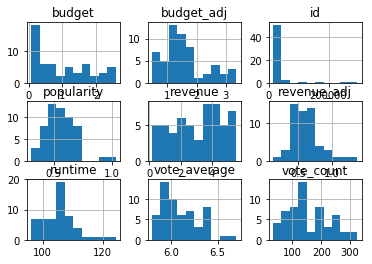

In [34]:
#Initial exploration to see possible trends
df_new.hist();

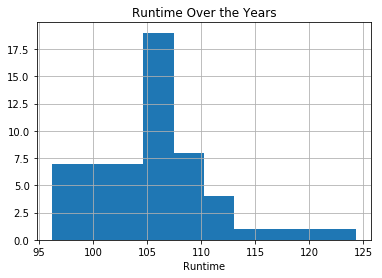

In [35]:
#Exploring runtime variable over the years to determine popular movie running duration
df_new['runtime'].hist()
plt.xlabel('Runtime')
plt.title('Runtime Over the Years');

In [15]:
df_new['runtime'].describe() #double check the values via function

count     56.000000
mean     105.714644
std        5.508458
min       96.179331
25%      101.910776
50%      105.678699
75%      107.593247
max      124.343750
Name: runtime, dtype: float64

<a id='runtime'></a>
### Observations about Runtimes:
- As seen in the plots and functions above, popular runtimes over the years are between 104 and 107 minutes.
- The distribution is right skewed.

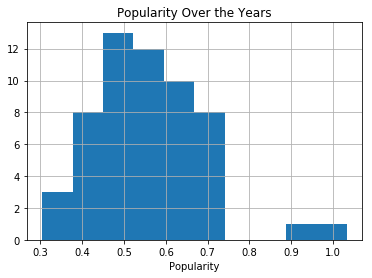

In [37]:
#Exploring popularity variable over the years to determine typical ratings by audiences
df_new['popularity'].hist()
plt.xlabel('Popularity')
plt.title('Popularity Over the Years');

In [38]:
df_new['popularity'].describe() #double check the values via function

count    56.000000
mean      0.559693
std       0.128434
min       0.304112
25%       0.469625
50%       0.546928
75%       0.626934
max       1.032126
Name: popularity, dtype: float64

<a id='popularity'></a>
### Observations about Popularity Ratings:
- As evident from histogram and quartile percentages, maximum ratings received fall in the 0.47 to 0.62 ranges. 
- The distribution is skewed to right.
- It is observed that no values lie in the range 0.73 to 0.89. This needs further scrutiny.

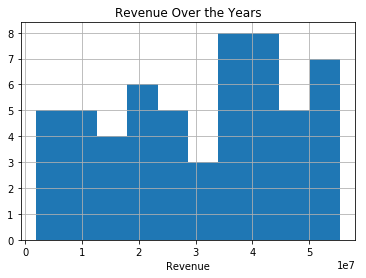

In [39]:
#Exploring revenue variable over the years to determine typical revenues grossed by the movies
df_new['revenue'].hist()
plt.xlabel('Revenue')
plt.title('Revenue Over the Years');

In [40]:
df_new['revenue'].describe() #double check the values via function

count    5.600000e+01
mean     3.076766e+07
std      1.574209e+07
min      1.842102e+06
25%      1.815642e+07
50%      3.257984e+07
75%      4.293171e+07
max      5.549569e+07
Name: revenue, dtype: float64

<a id='revenue'></a>
### Observations of Revenues:
From the plots and histogram, we can see that:
- Distribution is left skewed.
- Most movie revenues fall in the 3.257984e+07 to 4.293171e+07 ranges. `

<a id='eda2'></a>

## Exploratory Data Analysis

### Research Question 2
#### What variables affect the revenues of movies spanning the years? If so, how?
Steps:
- To answer this question,we view the correlation of variables from our dataset grouped over the years.
- In the eralier, visualizations, we only viewed one variable on grouping over years.
- Here, we visualize the relations between two variables using scatter plots to view the associations [if any]. 
- Below are observations on :
<ul>
<li><a href="#rev_pop">Revenue vs Popularity</a></li>
<li><a href="#rev_vc">Revenue vs Vote Counts</a></li>
<li><a href="#rev_va">Revenue vs Vote Averages</a></li>
</ul>



In [41]:
df_new.corr(method='pearson') #using correlation to determine factors influencing revenues

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
id,1.000000,0.612610,0.100292,0.152558,-0.441775,0.539964,-0.297719,-0.148336,-0.299723
popularity,0.612610,1.000000,0.668215,0.759156,-0.488974,0.849314,-0.574979,0.458952,-0.100506
budget,0.100292,0.668215,1.000000,0.906124,-0.401485,0.782026,-0.731797,0.891925,-0.158415
revenue,0.152558,0.759156,0.906124,1.000000,-0.466239,0.809243,-0.706442,0.767164,0.074952
runtime,-0.441775,-0.488974,-0.401485,-0.466239,1.000000,-0.612715,0.524770,-0.073168,0.300077
vote_count,0.539964,0.849314,0.782026,0.809243,-0.612715,1.000000,-0.658819,0.505434,-0.215568
vote_average,-0.297719,-0.574979,-0.731797,-0.706442,0.524770,-0.658819,1.000000,-0.557569,0.377204
budget_adj,-0.148336,0.458952,0.891925,0.767164,-0.073168,0.505434,-0.557569,1.000000,0.050086
revenue_adj,-0.299723,-0.100506,-0.158415,0.074952,0.300077,-0.215568,0.377204,0.050086,1.000000


##### From, the above correlation answers, we can see that :
- revenue is correlated positively with popularity and vote counts
- revenue is negatively correlated with vote averages.


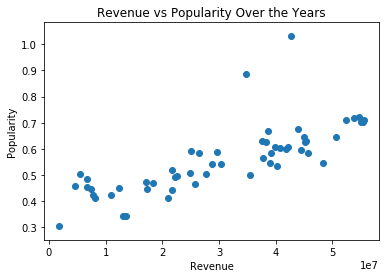

In [24]:
# Creating a scatterplot of revenue and popularity over the years
plt.scatter(x=df_new['revenue'], y=df_new['popularity'])
plt.xlabel('Revenue')
plt.ylabel('Popularity')
plt.title('Revenue vs Popularity Over the Years');

<a id='rev_pop'></a>
#### Observations- Revenue vs Popularity:
- The correlation computed from function is evident in the scatterplot. 
- Popularity is proportional to revenues. 
- The few outliers that grossed medium but were rated extremely high need to be looked into.

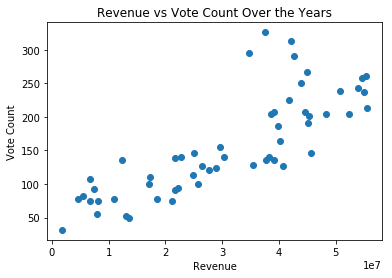

In [22]:
# Creating a scatterplot of revenue and vote counts over the years
plt.scatter(x=df_new['revenue'], y=df_new['vote_count'])
plt.xlabel('Revenue')
plt.ylabel('Vote Count')
plt.title('Revenue vs Vote Count Over the Years');

<a id='rev_vc'></a>
#### Observations- Revenue vs Vote Count:
- The correlation computed from function is evident in the scatterplot. 
- Vote count is roughly proportional to revenues. 
- Even in this plot, we observe that a few sample had high counts but did not gross commensurately in revenue. 
- This plot points us to scrutinize the vote counts and type of votes if possible or any other factors influencing voting such as *genres, cast,* etc.

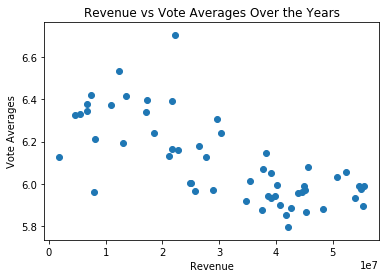

In [23]:
# Creating a scatterplot of revenue and vote averages over the years
plt.scatter(x=df_new['revenue'], y=df_new['vote_average'])
plt.xlabel('Revenue')
plt.ylabel('Vote Averages')
plt.title('Revenue vs Vote Averages Over the Years');

<a id='rev_va'></a>
#### Observations- Revenue vs Vote Average:
- The correlation computed from function is evident in the scatterplot. 
- Vote averages are inversely proportional to revenues. 
- Considering this plot and the previous, we can infer voting variables as influencing revenues. This means that detailed analysis is required to assess the outliers and possibly pursue a detailed line of investigation based on vote counts and averages.

<a id='conclusions'></a>
## Conclusions

- From our EDA, we discovered that over the years, there are *patterns to runtimes, popularity and revenues*. 
- While only tentative, we found that popular runtimes range between 104 and 107 minutes.
- Also, ratings had maximum likelihood of being in the 0.47 to 0.62 range.
- Revenues showed a wider range, but the most likely range was 3.257984e+07 to 4.293171e+07.
- We also analyzed multiple variables. Specifically, we chose to analyze *over time [release_year], the effect of particular variables [votes and popularity] on our factor of interest [revenue]*.
- Based on this analysis, we found that over the years, popularity and revenue show a direct relation. 
- Vote counts and revenue are related positively while vote averages are inversely related to revenues.
- However, these relations are merely correlations and do not imply causation.
- These lines of analysis point us to the need for further investigation, especially with regards to votes.

In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0